Bryan Flores <br>
ADS-509 <br>
Assignment 3.1 <br>
January 29, 2024

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [51]:
# Use this space for any additional import statements you need
import glob
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens)
    num_unique_tokens = len(Counter(tokens).keys())
    lexical_diversity =  num_unique_tokens / num_tokens
    num_characters =  sum([len(token) for token in tokens])

    # Find 5 most common tokens and create dataframe for presentation
    top_5_tokens = Counter(tokens).most_common(5)    
        
    return({'num_tokens_preproc': num_tokens, 
            'num_unique_tokens': num_unique_tokens,
            'lexical_diversity': lexical_diversity,
            'num_characters': num_characters,
            'top_5_tokens': top_5_tokens
            })
    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    """  
    Given a list of tokens, remove stop words.
    :param tokens: list, tokens
    :return tokens: list,
    """
    tokens_nostop = [w for w in tokens if not w.lower() in sw]
    
    return(tokens_nostop)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    # modify this function to return tokens
    # Set stop words
    stop_words = set(sw)
    lyrics = text.split()
    # remove punctuation, lower, and tokenize
    clean_string = [re.sub(r'[^\w\s]', '', item).lower() for item in lyrics] 
    # Store transformed 
    tokens_nostop = [w for w in clean_string if not w.lower() in stop_words]

    return tokens_nostop

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


In [73]:
text = "An n-gram is a sequence of n adjacent symbols in particular order."
# nopunc = remove_punctuation(text=text)
tok = tokenize(text=text)
remove_stop(tok)
# print(nopunc)

['ngram', 'sequence', 'n', 'adjacent', 'symbols', 'particular', 'order']

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [4]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "data/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [5]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [6]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

# Save to csv for later use
twitter_data.to_csv('data/twitter/twitter_data.csv')

In [66]:
# Read twitter data 
twitter_data = pd.read_csv('data/twitter/twitter_data.csv')  # uncomment if previous step already performed
twitter_data.head()

,Unnamed: 0,screen_name,name,id,location,followers_count,friends_count,description,artist
0,0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [7]:
# read in the lyrics here
lyrics_path = data_location + lyrics_folder
PATH = glob.iglob(f'{lyrics_path}/*')

""" 
    Example format:
    {
        'artist': cher,
        'filename': "cher_88degrees.txt",
        'title': "88 Degrees",
        'lyrics': "Stuck in L.A., ain't got no friends ..."
    }
"""

lyrics_list = []

for subdir in PATH:

    # Define subdirectories
    path = Path(subdir).glob('*')

    # Iterate over song txt files
    for file in path:

        # Obtain file names, artists, song titles, and lyrics 
        filename = Path(file).name
        artist = filename.split("_")[0]
        title = open(file, 'r').readline().strip("\n")
        lyrics = ' '.join([line.strip() for line in open(file, 'r').readlines()[3:]]).lstrip()

        # Key-values
        lyrics_dict = {
            'artist': artist,
            'filename': filename,
            'title': title,
            'lyrics': lyrics
            }
        lyrics_list.append(lyrics_dict)

lyrics_data = pd.DataFrame(lyrics_list)
# Save to csv for later use
lyrics_data.to_csv('data/lyrics/lyrics_data.csv')

In [67]:
# Read lyrics data
lyrics_data = pd.read_csv('data/lyrics/lyrics_data.csv')  # uncomment if previous step already performed
lyrics_data.head()

,Unnamed: 0,artist,filename,title,lyrics
0,0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol..."
1,1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...
2,2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat..."
3,3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...
4,4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [78]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

# my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]
my_pipeline = [tokenize, remove_stop]  # punctuation removal embedded in tokenization function

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

lyrics_data.head()

,Unnamed: 0,artist,filename,title,lyrics,tokens,num_tokens
0,0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol...","[stuck, la, aint, got, friends, hollywood, nut...",180
1,1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...,"[world, crazy, sane, would, strange, cant, bel...",142
2,2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat...","[well, guess, must, fate, weve, tried, deep, i...",120
3,3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...,"[evening, finds, door, ask, could, try, dont, ...",34
4,4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the...","[whats, alfie, moment, live, whats, sort, alfi...",66


In [79]:
# Apply pipeline techniques to twitter data
twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

In [80]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [81]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
1401099,cher,Contador Auditor. ♌️ Peripatético!,"[contador, auditor, , peripatético]"
2813194,cher,YOU ARE MY PEACHH YOU ARE PLUM YOU ARE MY HEAR...,"[peachh, plum, heart, sun, ]"
2308262,cher,"Just a small town girl, living in a lonely wor...","[small, town, girl, living, lonely, world, liv..."
3949244,cher,#Garbage 👑🦑,"[garbage, ]"
68888,cher,"Comms/PR pro crazy 'bout #plantbased food, hea...","[commspr, pro, crazy, bout, plantbased, food, ..."
2736024,cher,"Mom of 3 Andrew, Gabriella and Stephen...also ...","[mom, 3, andrew, gabriella, stephenalso, mom, ..."
3956237,cher,Born aloha 🏝🌺🥥🍍,"[born, aloha, ]"
4323745,robyn,"I tweet about music a lot, also sports, politi...","[tweet, music, lot, also, sports, politics, ra..."
3918170,cher,👻🦄⭐️🌜,[]
697834,cher,"🍊man-fan #MAGA “Do Justice, Love Mercy, Walk H...","[manfan, maga, justice, love, mercy, walk, hum..."


In [83]:
# Store newly processed lyric and twitter data
# lyrics_data.to_csv('data/lyrics/lyrics_data.csv')
# twitter_data.to_csv('data/twitter/twitter_data.csv')

With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: Identifying n-grams would be useful for working with Twitter data as people typically group certain descriptions or tweets together such as 'Covid-19 pandemic', 'COVID-19 Pandemic', 'COVID-19 and' etc.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [5]:
# Read newly processed lyric and twitter data
lyrics_data = pd.read_csv('data/lyrics/lyrics_data.csv')
twitter_data = pd.read_csv('data/twitter/twitter_data.csv')

In [6]:
# your code here
# Lyrics data statistics 
lyrics_data['statistics'] = [descriptive_stats(i) for i in lyrics_data['lyrics']]

In [58]:
df = lyrics_data.copy()
lyrics_df = pd.concat([df, df['statistics'].apply(pd.Series)], axis=1)
lyrics_df.drop(columns=['statistics', 'Unnamed: 0'], inplace=True)
lyrics_df['tokens'] = lyrics_df['tokens'].apply(ast.literal_eval)
lyrics_df[['artist', 'tokens', 'num_tokens', 'num_tokens_preproc', 'num_unique_tokens', 'lexical_diversity']].head(10)

,artist,tokens,num_tokens,num_tokens_preproc,num_unique_tokens,lexical_diversity
0,cher,"[stuck, la, aint, got, friends, hollywood, nut...",180,1546,44,0.028461
1,cher,"[world, crazy, sane, would, strange, cant, bel...",142,1252,37,0.029553
2,cher,"[well, guess, must, fate, weve, tried, deep, i...",120,1434,34,0.023710
3,cher,"[evening, finds, door, ask, could, try, dont, ...",34,362,32,0.088398
4,cher,"[whats, alfie, moment, live, whats, sort, alfi...",66,687,37,0.053857
5,cher,"[alone, must, stand, even, im, running, feels,...",103,940,41,0.043617
6,cher,"[sometimes, heart, mind, sometimes, tell, im, ...",94,1324,35,0.026435
7,cher,"[aint, lookin, compete, beat, cheat, mistreat,...",81,1025,40,0.039024
8,cher,"[ive, standing, rain, ive, calling, name, ive,...",133,1377,37,0.026870
9,cher,"[blue, ah, blue, aint, tears, eyes, telling, b...",67,661,34,0.051437


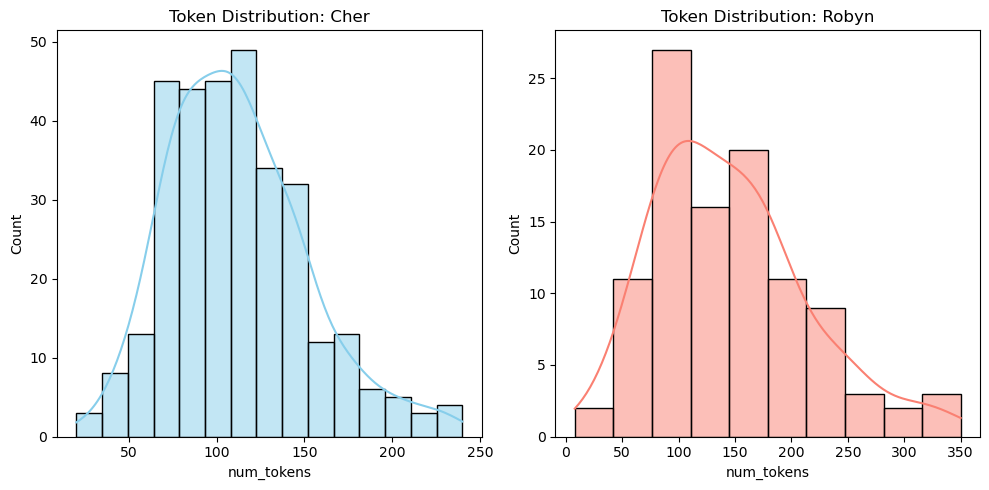

In [59]:
# Filter for cher and robyn
lyrics_cher = lyrics_df[lyrics_df['artist'] == 'cher']
lyrics_robyn = lyrics_df[lyrics_df['artist'] == 'robyn']

# Create distribution plots for key1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=lyrics_cher, x='num_tokens', kde=True, color='skyblue')
plt.title('Token Distribution: Cher')

plt.subplot(1, 2, 2)
sns.histplot(data=lyrics_robyn, x='num_tokens', kde=True, color='salmon')
plt.title('Token Distribution: Robyn')

plt.tight_layout()
plt.show()

Q: what observations do you make about these data? 

A: The number of tokens used by Cher followers display a slightly normal distribution compared to their Robyn counterparts. Alternatively, the center of each distribution is around 100 tokens even though the number of Cher-follower descriptions is approximately twice that of Robyn-followers.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

#### Notes
- main point: calculations needed to do in python are in spreadsheet. compare
- tf-idf matrix: what tokens appear a lot and discount that appear a lot in a given document
- works better if the document is a book, webpage, etc.
- for every word, we can come up with a rate of usage in a corpus
- example: maybe 1% of shared lyrics are love
- take the first corpus for lyrics-1 and calculate concentrations and ratio. if they appear often enough, 

In [80]:
# Flatten the lists in the 'tokens' column
cher_tokens = [token for sublist in lyrics_cher['tokens'] for token in sublist]
robyn_tokens = [token for sublist in lyrics_robyn['tokens'] for token in sublist]

# Count unique tokens and sort from greatest to least
unique_tkn_cher = sorted(Counter(cher_tokens).items(), key=lambda x: x[1], reverse=True)
unique_tkn_robyn = sorted(Counter(robyn_tokens).items(), key=lambda x: x[1], reverse=True)

In [81]:
unique_tkn_cher[:10]

[('love', 966),
 ('im', 511),
 ('know', 480),
 ('dont', 430),
 ('youre', 332),
 ('baby', 315),
 ('time', 313),
 ('see', 308),
 ('oh', 306),
 ('one', 275)]

In [104]:
# Calculate Concentrations
""" concentration = token_count / corpus_token_length """
# Corpus token lengths
token_len_cher = sum(len(item) for sublist in lyrics_cher['tokens'] for item in sublist)
token_len_robyn = sum(len(item) for sublist in lyrics_robyn['tokens'] for item in sublist)

print(f"Cher corpus token length: {token_len_cher}")
print(f"Robyn corpus token length: {token_len_robyn}")

Cher corpus token length: 169210
Robyn corpus token length: 72691


In [124]:
# Concentration Cher
conc_lyrics_cher = [(i, count / token_len_cher) for i, count in unique_tkn_cher]

# Create Group Compare table
compare_df = pd.DataFrame(conc_lyrics_cher, columns=['token', 'concentration_cher_lyrics'])
compare_df.head()

,token,concentration_cher_lyrics
0,love,0.005709
1,im,0.003020
2,know,0.002837
3,dont,0.002541
4,youre,0.001962


In [126]:
# Concentration Robyn
conc_lyrics_robyn = [(i, count / token_len_robyn) for i, count in unique_tkn_robyn]

# Concatenate Group Compare tables
compare_df_2 = pd.DataFrame(conc_lyrics_robyn, columns=['token', 'concentration_robyn_lyrics'])
compare_df_3 = pd.DataFrame(unique_tkn_cher, columns=['token', 'corpus_count_cher'])
compare_df_4 = pd.DataFrame(unique_tkn_robyn, columns=['token', 'corpus_count_robyn'])

compare_df = pd.merge(pd.merge(pd.merge(compare_df, compare_df_2, on='token'), 
                               compare_df_3, on='token'), 
                               compare_df_4, on='token')

compare_df[:10]

,token,concentration_cher_lyrics,concentration_robyn_lyrics,corpus_count_cher,corpus_count_robyn
0,love,0.005709,0.003701,966,269
1,im,0.003020,0.004113,511,299
2,know,0.002837,0.004196,480,305
3,dont,0.002541,0.004086,430,297
4,youre,0.001962,0.002325,332,169
5,baby,0.001862,0.003027,315,220
6,time,0.001850,0.001417,313,103
7,see,0.001820,0.000784,308,57
8,oh,0.001808,0.000825,306,60
9,one,0.001625,0.000867,275,63


In [127]:
# Calculate cutoff
n = 5  # cutoff
cher_ct = compare_df['corpus_count_cher']
robyn_ct = compare_df['corpus_count_robyn']

passes_cutoff = []
for i, j in zip(cher_ct, robyn_ct):
    if i > n and j > n:
        passes_cutoff.append('yes')
    else:
        passes_cutoff.append('no')

compare_df['passes_cutoff'] = passes_cutoff
compare_df.head()

,token,concentration_cher_lyrics,concentration_robyn_lyrics,corpus_count_cher,corpus_count_robyn,passes_cutoff
0,love,0.005709,0.003701,966,269,yes
1,im,0.003020,0.004113,511,299,yes
2,know,0.002837,0.004196,480,305,yes
3,dont,0.002541,0.004086,430,297,yes
4,youre,0.001962,0.002325,332,169,yes


In [134]:
# Calculate ratio
compare_df['ratio'] = compare_df['concentration_cher_lyrics'] / compare_df['concentration_robyn_lyrics']
compare_df.head(10)

,token,concentration_cher_lyrics,concentration_robyn_lyrics,corpus_count_cher,corpus_count_robyn,passes_cutoff,ratio
0,love,0.005709,0.003701,966,269,yes,1.542693
1,im,0.003020,0.004113,511,299,yes,0.734183
2,know,0.002837,0.004196,480,305,yes,0.676077
3,dont,0.002541,0.004086,430,297,yes,0.621966
4,youre,0.001962,0.002325,332,169,yes,0.843929
5,baby,0.001862,0.003027,315,220,yes,0.615095
6,time,0.001850,0.001417,313,103,yes,1.305454
7,see,0.001820,0.000784,308,57,yes,2.321296
8,oh,0.001808,0.000825,306,60,yes,2.190911
9,one,0.001625,0.000867,275,63,yes,1.875196


In [133]:
compare_df.sort_values(by='ratio', ascending=False)

,token,concentration_cher_lyrics,concentration_robyn_lyrics,corpus_count_cher,corpus_count_robyn,passes_cutoff,ratio
66,bang,0.000508,0.000014,86,1,no,36.944779
140,loving,0.000278,0.000014,47,1,no,20.190751
190,red,0.000219,0.000014,37,1,no,15.894847
193,sad,0.000213,0.000014,36,1,no,15.465256
97,ah,0.000372,0.000028,63,2,no,13.532099
...,...,...,...,...,...,...,...
1060,reading,0.000006,0.000261,1,19,no,0.022610
1121,bomb,0.000006,0.000289,1,21,no,0.020457
1127,pressure,0.000006,0.000289,1,21,no,0.020457
1061,electric,0.000006,0.000371,1,27,no,0.015911


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: The ratios are close to 1 even though it is clear the total counts are disproportionate. Alternately, the high ratios don't exhibit a pattern or similarity, where as robyn uses words such as 'bomb', 'pressure', 'killing' a lot.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [135]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [138]:
count_words(lyrics_df)

,freq
token,
love,1235
im,810
know,785
dont,727
baby,535
...,...
dapple,2
logic,2
wound,2


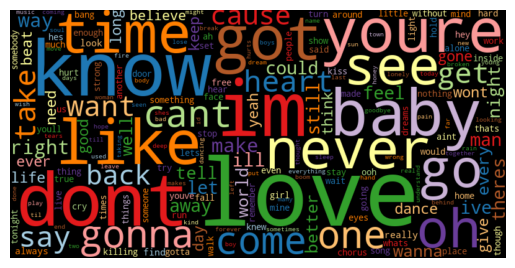

In [140]:
word_freq_df = count_words(lyrics_df)
wordcloud(word_freq_df['freq'])

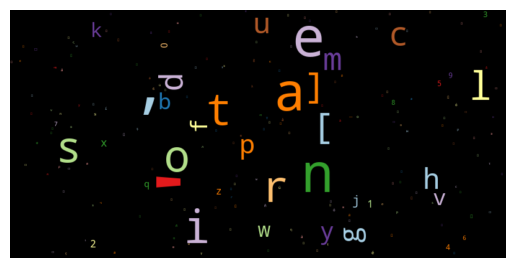

In [141]:
word_freq_df = count_words(twitter_data)
wordcloud(word_freq_df['freq'])

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: The words with the highest frequencies are the largest. For the artist's lyrics it's clear both artist sing about relationships and you can reorganize these words into loving messages or patterns. However, the twitter data contains no pattern -- only letters and a few symbols. Additionally, there are voids in the twitter data word cloud, where as none exist for the lyrics cloud.